___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [5]:
df.duplicated().sum()

0

In [6]:
dropped_columns = ["RowNumber","CustomerId","Surname"]
df.drop(columns=dropped_columns,inplace=True)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.shape

(10000, 11)

In [9]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
df["Geography"].replace({"France" : 0, "Spain" : 1, "Germany" : 2}, inplace=True)
df["Gender"].replace({"Male" : 0, "Female" : 1}, inplace=True)

In [11]:
df["Geography"].unique()

array([0, 1, 2], dtype=int64)

In [12]:
# Target column
# df["Exited"].replace({0 : "stay", 1 : "left"}, inplace=True)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Geography,10000.0,0.749500,0.830433,0.00,0.00,0.000,2.0000,2.00
Gender,10000.0,0.454300,0.497932,0.00,0.00,0.000,1.0000,1.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


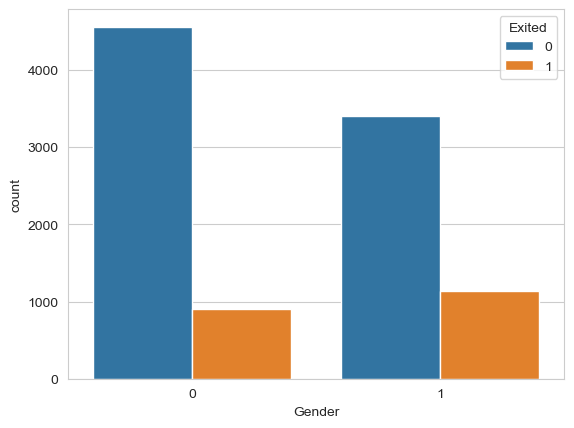

In [14]:
sns.countplot(x="Gender", hue="Exited", data=df)
plt.show()

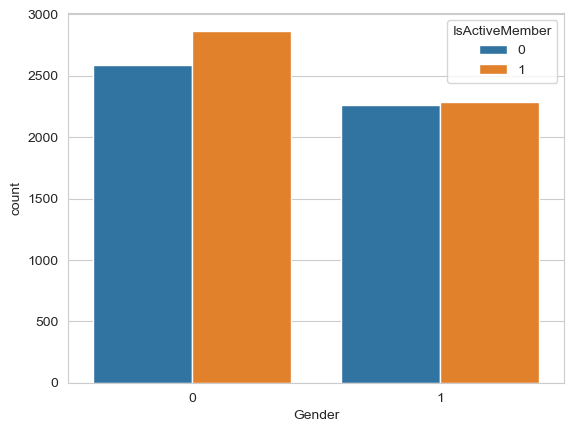

In [15]:
sns.countplot(x="Gender", hue="IsActiveMember", data=df)
plt.show()
# Only have of the bank users are active

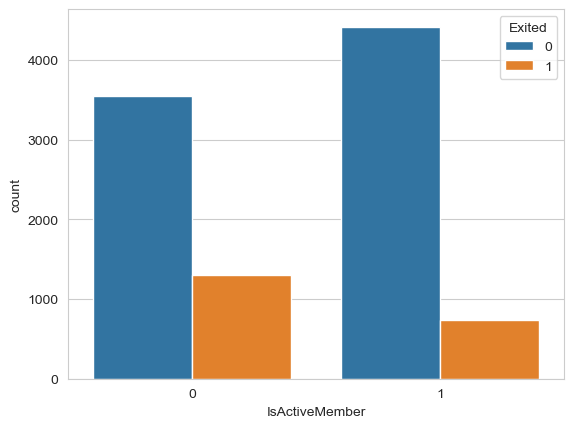

In [16]:
sns.countplot(x="IsActiveMember", hue="Exited", data=df)
plt.show()
# We can see that those who are not active has a high chance to leave the bank

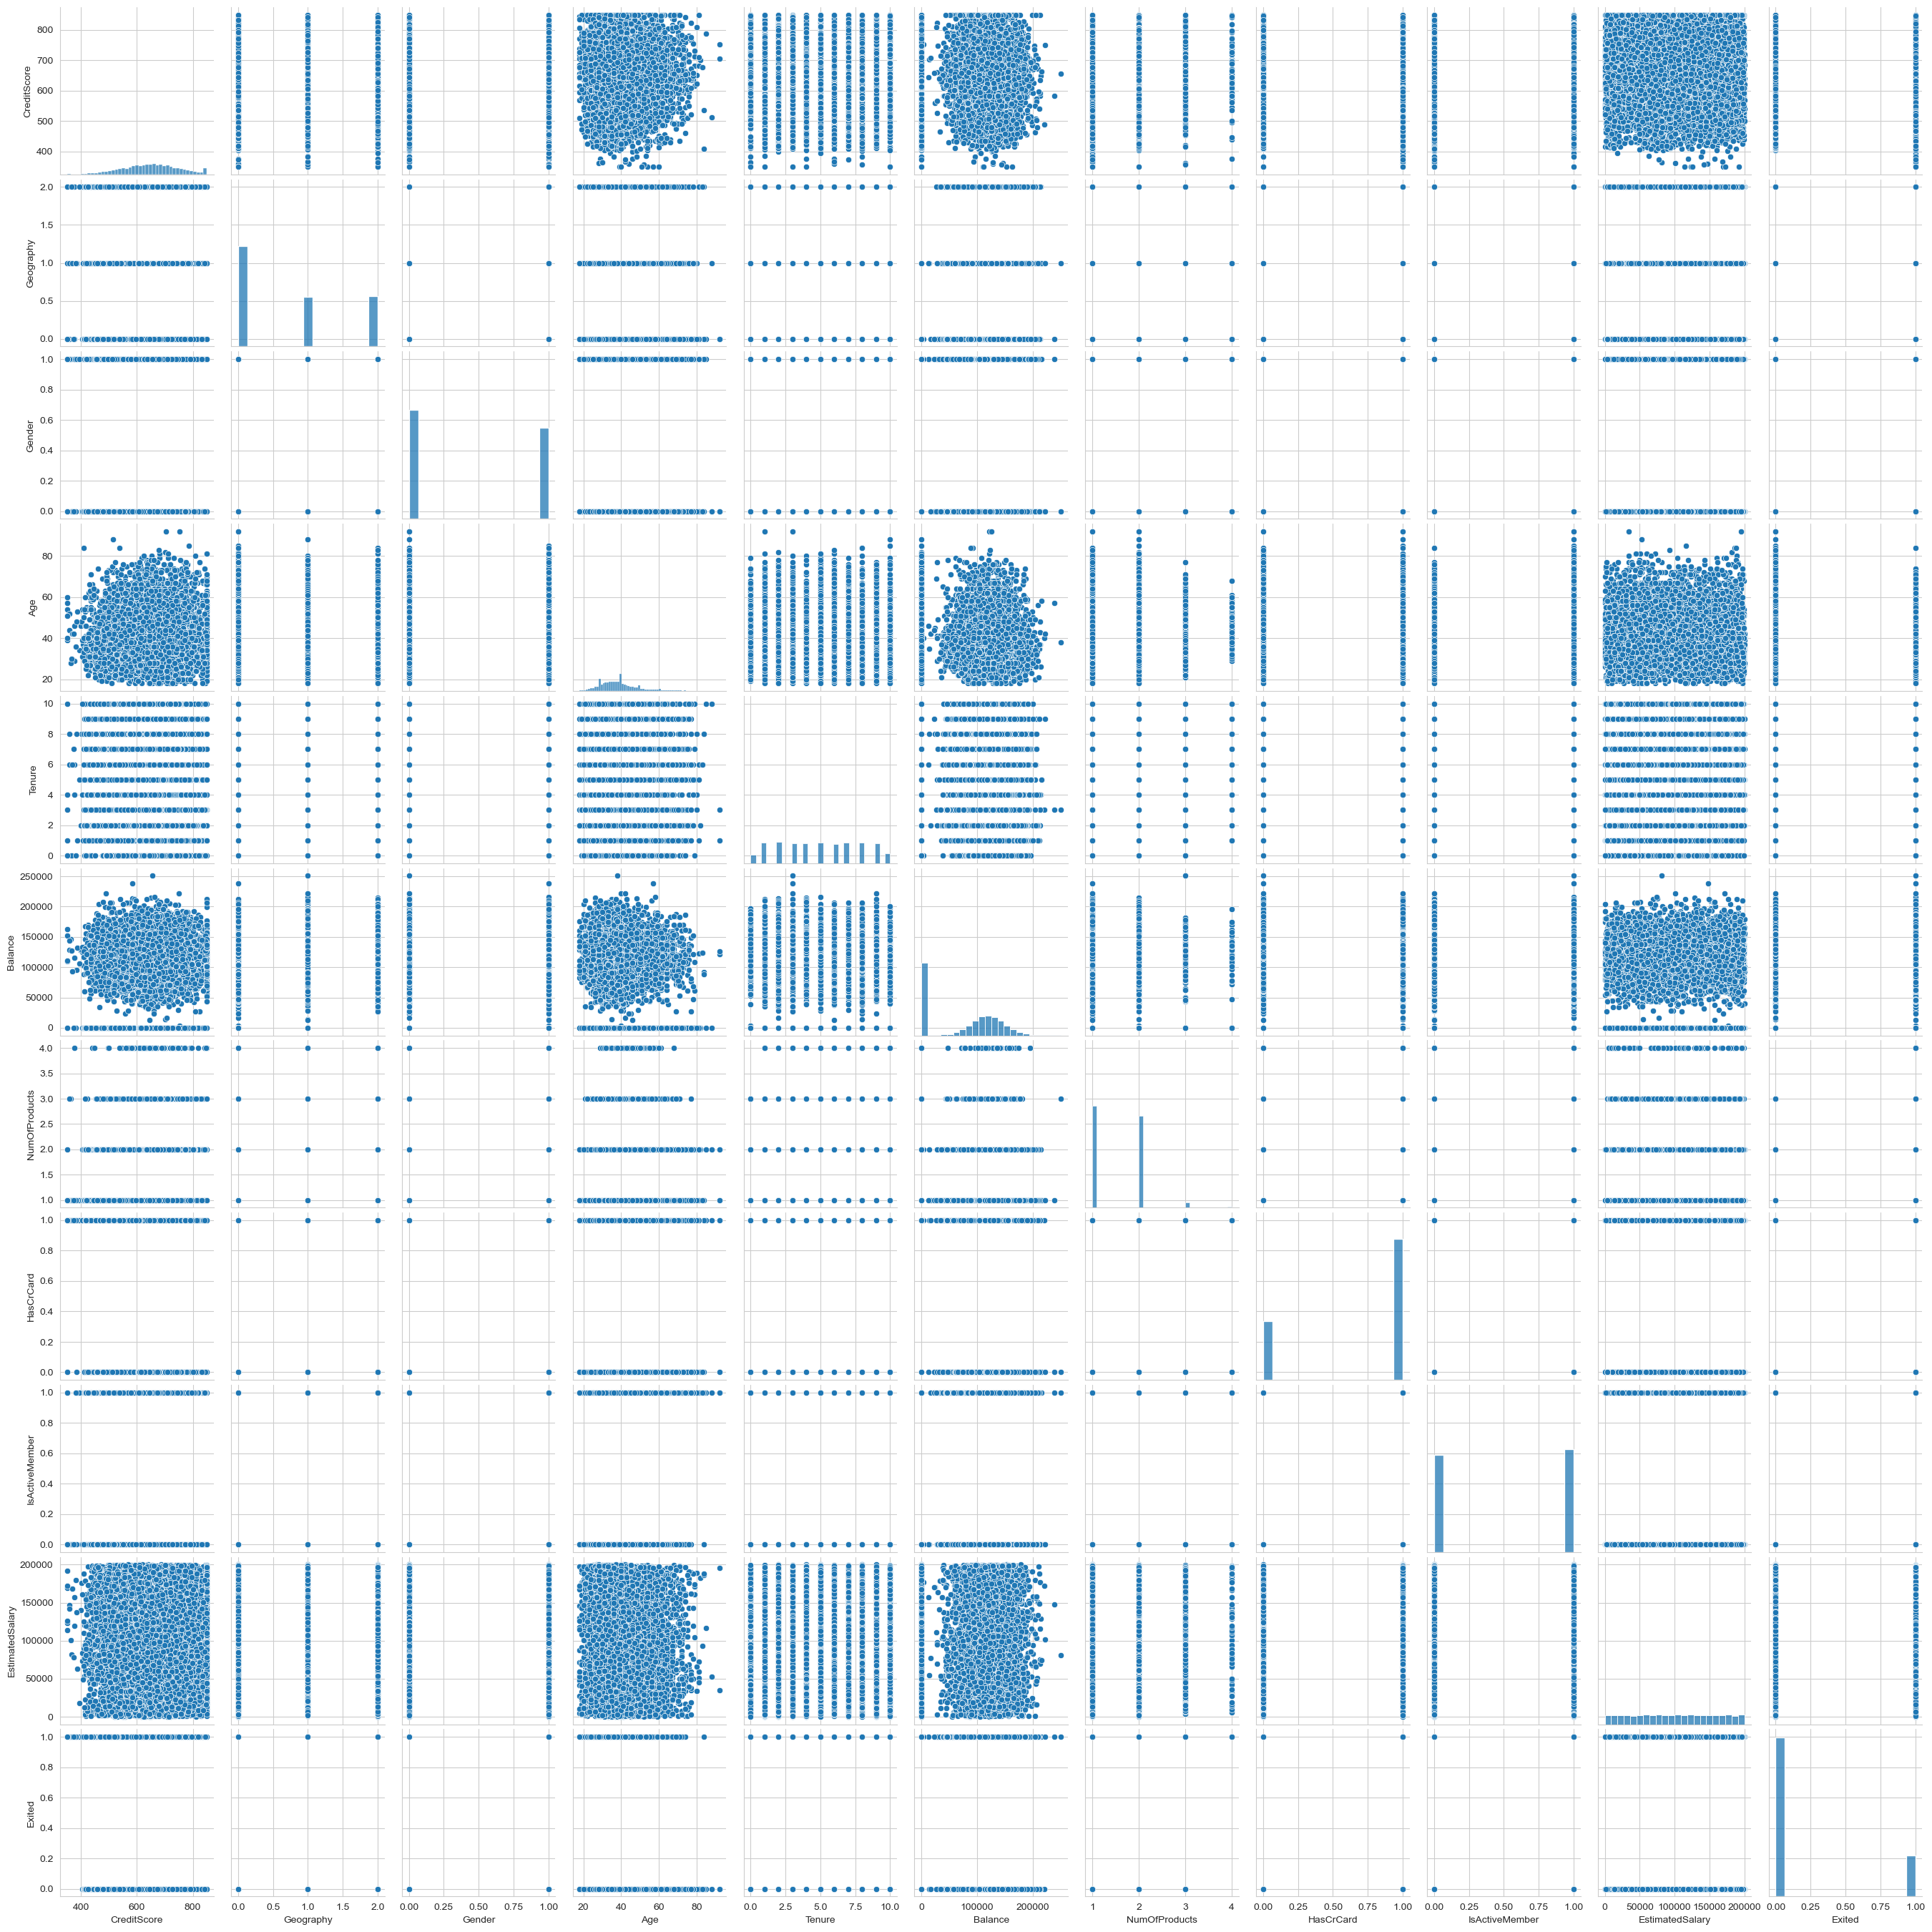

In [21]:
sns.pairplot(df)

# Preprocessing of Data
- Train | Test Split, Scalling

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [26]:
X = df.drop("Exited", axis=1)
y = df.Exited

In [27]:
seed = 101

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [29]:
scaler = RobustScaler()

In [30]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [59]:
import tensorflow as tf

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [61]:
def eval_metric(actual, pred):
    """Prints regression metrics, calculated using the given
    actual and predicted target values.
    Args:
        actual (list): Actual target values.
        pred (list): Predicted target values.
    Returns:
        None
    """
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [62]:
X_train.shape

(8000, 10)

In [63]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(10, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="binary_crossentropy")

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.fit(x=X_train, y=y_train, validation_split=0.10, batch_size=32, epochs= 500)

Train on 7200 samples, validate on 800 samples
Epoch 1/500
7200/7200 [==============================] - 2s 323us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 2/500
7200/7200 [==============================] - 1s 88us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 3/500
7200/7200 [==============================] - 1s 93us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 4/500
7200/7200 [==============================] - 1s 90us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 5/500
7200/7200 [==============================] - 1s 101us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 6/500
7200/7200 [==============================] - 1s 102us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 7/500
7200/7200 [==============================] - 1s 93us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 8/500
7200/7200 [==============================] - 1s 94us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 9/500
7200/7200 [==============================] - 1s 102us/sample - loss: 3.1621 - val_loss: 2.

Epoch 77/500
7200/7200 [==============================] - 1s 85us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 78/500
7200/7200 [==============================] - 1s 97us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 79/500
7200/7200 [==============================] - 1s 99us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 80/500
7200/7200 [==============================] - 1s 91us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 81/500
7200/7200 [==============================] - 1s 100us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 82/500
7200/7200 [==============================] - 1s 91us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 83/500
7200/7200 [==============================] - 1s 108us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 84/500
7200/7200 [==============================] - 1s 94us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 85/500
7200/7200 [==============================] - 1s 98us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 86/500
7200/7200 [===========

7200/7200 [==============================] - 1s 101us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 153/500
7200/7200 [==============================] - 1s 96us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 154/500
7200/7200 [==============================] - 1s 92us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 155/500
7200/7200 [==============================] - 1s 77us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 156/500
7200/7200 [==============================] - 1s 72us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 157/500
7200/7200 [==============================] - 1s 89us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 158/500
7200/7200 [==============================] - 1s 89us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 159/500
7200/7200 [==============================] - 1s 96us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 160/500
7200/7200 [==============================] - 1s 92us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 161/500
7200/7200 [================

7200/7200 [==============================] - 1s 96us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 228/500
7200/7200 [==============================] - 1s 98us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 229/500
7200/7200 [==============================] - 1s 93us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 230/500
7200/7200 [==============================] - 1s 88us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 231/500
7200/7200 [==============================] - 1s 86us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 232/500
7200/7200 [==============================] - 1s 75us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 233/500
7200/7200 [==============================] - 1s 85us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 234/500
7200/7200 [==============================] - 1s 91us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 235/500
7200/7200 [==============================] - 1s 97us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 236/500
7200/7200 [=================

Epoch 303/500
7200/7200 [==============================] - 1s 90us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 304/500
7200/7200 [==============================] - 1s 107us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 305/500
7200/7200 [==============================] - 1s 100us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 306/500
7200/7200 [==============================] - 1s 99us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 307/500
7200/7200 [==============================] - 1s 92us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 308/500
7200/7200 [==============================] - 1s 83us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 309/500
7200/7200 [==============================] - 1s 91us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 310/500
7200/7200 [==============================] - 1s 82us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 311/500
7200/7200 [==============================] - 1s 71us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 312/500
7200/7200 [=

Epoch 379/500
7200/7200 [==============================] - 1s 99us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 380/500
7200/7200 [==============================] - 1s 102us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 381/500
7200/7200 [==============================] - 1s 93us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 382/500
7200/7200 [==============================] - 1s 90us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 383/500
7200/7200 [==============================] - 1s 94us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 384/500
7200/7200 [==============================] - 1s 94us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 385/500
7200/7200 [==============================] - 1s 91us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 386/500
7200/7200 [==============================] - 1s 93us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 387/500
7200/7200 [==============================] - 1s 89us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 388/500
7200/7200 [==

Epoch 455/500
7200/7200 [==============================] - 1s 89us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 456/500
7200/7200 [==============================] - 1s 87us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 457/500
7200/7200 [==============================] - 1s 92us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 458/500
7200/7200 [==============================] - 1s 94us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 459/500
7200/7200 [==============================] - 1s 90us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 460/500
7200/7200 [==============================] - 1s 92us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 461/500
7200/7200 [==============================] - 1s 86us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 462/500
7200/7200 [==============================] - 1s 90us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 463/500
7200/7200 [==============================] - 1s 91us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 464/500
7200/7200 [===

In [67]:
model.weights

[<tf.Variable 'dense_8/kernel:0' shape=(10, 10) dtype=float32>,
 <tf.Variable 'dense_8/bias:0' shape=(10,) dtype=float32>,
 <tf.Variable 'dense_9/kernel:0' shape=(10, 8) dtype=float32>,
 <tf.Variable 'dense_9/bias:0' shape=(8,) dtype=float32>,
 <tf.Variable 'dense_10/kernel:0' shape=(8, 4) dtype=float32>,
 <tf.Variable 'dense_10/bias:0' shape=(4,) dtype=float32>,
 <tf.Variable 'dense_11/kernel:0' shape=(4, 1) dtype=float32>,
 <tf.Variable 'dense_11/bias:0' shape=(1,) dtype=float32>]

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [68]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,3.162114,2.660804
1,3.162114,2.660804
2,3.162114,2.660804
3,3.162114,2.660804
4,3.162114,2.660804
...,...,...
495,3.162114,2.660804
496,3.162114,2.660804
497,3.162114,2.660804
498,3.162114,2.660804


<Axes: >

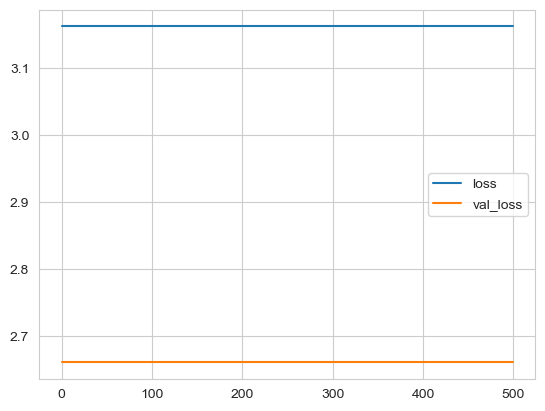

In [69]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [70]:
model.evaluate(X_test, y_test, verbose=0)

3.2623766021728517

In [71]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1577    0]
 [ 423    0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1577
           1       0.00      0.00      0.00       423

    accuracy                           0.79      2000
   macro avg       0.39      0.50      0.44      2000
weighted avg       0.62      0.79      0.70      2000



In [72]:
eval_metric(y_test, y_pred)

r2_score: -0.26823081800887727 
mae: 0.2115 
mse: 0.2115 
rmse: 0.45989129150267677


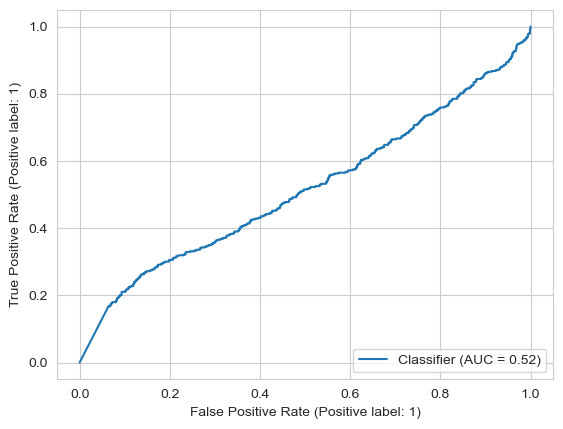

In [73]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [74]:
roc_auc_score(y_test, y_pred_proba)

0.5169239856027319

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [75]:
from tensorflow.python.keras.optimizers import adam_v2

In [76]:
Adam = adam_v2.Adam

In [77]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(10, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1))

opt = Adam(learning_rate=0.004)

model.compile(optimizer=opt, loss="binary_crossentropy")

In [78]:
model.weights

[<tf.Variable 'dense_12/kernel:0' shape=(10, 10) dtype=float32>,
 <tf.Variable 'dense_12/bias:0' shape=(10,) dtype=float32>,
 <tf.Variable 'dense_13/kernel:0' shape=(10, 8) dtype=float32>,
 <tf.Variable 'dense_13/bias:0' shape=(8,) dtype=float32>,
 <tf.Variable 'dense_14/kernel:0' shape=(8, 4) dtype=float32>,
 <tf.Variable 'dense_14/bias:0' shape=(4,) dtype=float32>,
 <tf.Variable 'dense_15/kernel:0' shape=(4, 1) dtype=float32>,
 <tf.Variable 'dense_15/bias:0' shape=(1,) dtype=float32>]

In [79]:
model.fit(x=X_train,y=y_train, validation_split=0.10, batch_size=36, epochs=500)

Train on 7200 samples, validate on 800 samples
Epoch 1/500
7200/7200 [==============================] - 2s 217us/sample - loss: 0.7515 - val_loss: 0.4533
Epoch 2/500
7200/7200 [==============================] - 1s 85us/sample - loss: 0.5024 - val_loss: 0.4432
Epoch 3/500
7200/7200 [==============================] - 1s 83us/sample - loss: 0.4991 - val_loss: 0.4375
Epoch 4/500
7200/7200 [==============================] - 1s 88us/sample - loss: 0.4893 - val_loss: 0.4292
Epoch 5/500
7200/7200 [==============================] - 1s 87us/sample - loss: 0.4953 - val_loss: 0.4216
Epoch 6/500
7200/7200 [==============================] - 1s 85us/sample - loss: 0.4869 - val_loss: 0.4066
Epoch 7/500
7200/7200 [==============================] - 1s 73us/sample - loss: 0.4687 - val_loss: 0.4140
Epoch 8/500
7200/7200 [==============================] - 1s 90us/sample - loss: 0.4767 - val_loss: 0.4144
Epoch 9/500
7200/7200 [==============================] - 1s 85us/sample - loss: 0.4837 - val_loss: 0.420

Epoch 77/500
7200/7200 [==============================] - 1s 86us/sample - loss: 0.3622 - val_loss: 0.3725
Epoch 78/500
7200/7200 [==============================] - 1s 88us/sample - loss: 0.3587 - val_loss: 0.3732
Epoch 79/500
7200/7200 [==============================] - 1s 88us/sample - loss: 0.3529 - val_loss: 0.3730
Epoch 80/500
7200/7200 [==============================] - 1s 91us/sample - loss: 0.3669 - val_loss: 0.3939
Epoch 81/500
7200/7200 [==============================] - 1s 83us/sample - loss: 0.3537 - val_loss: 0.3893
Epoch 82/500
7200/7200 [==============================] - 1s 78us/sample - loss: 0.3558 - val_loss: 0.3855
Epoch 83/500
7200/7200 [==============================] - 1s 86us/sample - loss: 0.3533 - val_loss: 0.3872
Epoch 84/500
7200/7200 [==============================] - 1s 81us/sample - loss: 0.4042 - val_loss: 0.3987
Epoch 85/500
7200/7200 [==============================] - 1s 95us/sample - loss: 0.3813 - val_loss: 0.3721
Epoch 86/500
7200/7200 [=============

7200/7200 [==============================] - 1s 93us/sample - loss: 0.3816 - val_loss: 0.3803
Epoch 154/500
7200/7200 [==============================] - 1s 88us/sample - loss: 0.3577 - val_loss: 0.4134
Epoch 155/500
7200/7200 [==============================] - 1s 85us/sample - loss: 0.3448 - val_loss: 0.3995
Epoch 156/500
7200/7200 [==============================] - 1s 84us/sample - loss: 0.3366 - val_loss: 0.4003
Epoch 157/500
7200/7200 [==============================] - 1s 86us/sample - loss: 0.3343 - val_loss: 0.4266
Epoch 158/500
7200/7200 [==============================] - 1s 93us/sample - loss: 0.3524 - val_loss: 0.3818
Epoch 159/500
7200/7200 [==============================] - 1s 100us/sample - loss: 0.3407 - val_loss: 0.3817
Epoch 160/500
7200/7200 [==============================] - 1s 86us/sample - loss: 0.3380 - val_loss: 0.3784
Epoch 161/500
7200/7200 [==============================] - 1s 96us/sample - loss: 0.3446 - val_loss: 0.3972
Epoch 162/500
7200/7200 [================

Epoch 229/500
7200/7200 [==============================] - 1s 83us/sample - loss: 0.3640 - val_loss: 0.3975
Epoch 230/500
7200/7200 [==============================] - 1s 85us/sample - loss: 0.3481 - val_loss: 0.3895
Epoch 231/500
7200/7200 [==============================] - 1s 82us/sample - loss: 0.3444 - val_loss: 0.3748
Epoch 232/500
7200/7200 [==============================] - 1s 90us/sample - loss: 0.3543 - val_loss: 0.3951
Epoch 233/500
7200/7200 [==============================] - 1s 94us/sample - loss: 0.3492 - val_loss: 0.4122
Epoch 234/500
7200/7200 [==============================] - 1s 82us/sample - loss: 0.3761 - val_loss: 0.4858
Epoch 235/500
7200/7200 [==============================] - 1s 83us/sample - loss: 0.3536 - val_loss: 0.4160
Epoch 236/500
7200/7200 [==============================] - 1s 91us/sample - loss: 0.3423 - val_loss: 0.3900
Epoch 237/500
7200/7200 [==============================] - 1s 79us/sample - loss: 0.3374 - val_loss: 0.4166
Epoch 238/500
7200/7200 [===

Epoch 305/500
7200/7200 [==============================] - 1s 90us/sample - loss: 0.3540 - val_loss: 0.4377
Epoch 306/500
7200/7200 [==============================] - 1s 97us/sample - loss: 0.3408 - val_loss: 0.4016
Epoch 307/500
7200/7200 [==============================] - 1s 96us/sample - loss: 0.3467 - val_loss: 0.4099
Epoch 308/500
7200/7200 [==============================] - 1s 97us/sample - loss: 0.3459 - val_loss: 0.4285
Epoch 309/500
7200/7200 [==============================] - 1s 87us/sample - loss: 0.3423 - val_loss: 0.3893
Epoch 310/500
7200/7200 [==============================] - 1s 84us/sample - loss: 0.3396 - val_loss: 0.4212
Epoch 311/500
7200/7200 [==============================] - 1s 86us/sample - loss: 0.3375 - val_loss: 0.4062
Epoch 312/500
7200/7200 [==============================] - 1s 93us/sample - loss: 0.3381 - val_loss: 0.4021
Epoch 313/500
7200/7200 [==============================] - 1s 93us/sample - loss: 0.3390 - val_loss: 0.4180
Epoch 314/500
7200/7200 [===

Epoch 381/500
7200/7200 [==============================] - 1s 87us/sample - loss: 0.3455 - val_loss: 0.3956
Epoch 382/500
7200/7200 [==============================] - 1s 86us/sample - loss: 0.3372 - val_loss: 0.3869
Epoch 383/500
7200/7200 [==============================] - 1s 82us/sample - loss: 0.3359 - val_loss: 0.4159
Epoch 384/500
7200/7200 [==============================] - 1s 97us/sample - loss: 0.3374 - val_loss: 0.4275
Epoch 385/500
7200/7200 [==============================] - 1s 90us/sample - loss: 0.3342 - val_loss: 0.4280
Epoch 386/500
7200/7200 [==============================] - 1s 85us/sample - loss: 0.3363 - val_loss: 0.4188
Epoch 387/500
7200/7200 [==============================] - 1s 95us/sample - loss: 0.3353 - val_loss: 0.4331
Epoch 388/500
7200/7200 [==============================] - 1s 89us/sample - loss: 0.4534 - val_loss: 0.5549
Epoch 389/500
7200/7200 [==============================] - 1s 85us/sample - loss: 0.4639 - val_loss: 0.4180
Epoch 390/500
7200/7200 [===

7200/7200 [==============================] - 1s 79us/sample - loss: 0.3310 - val_loss: 0.4136
Epoch 457/500
7200/7200 [==============================] - 1s 88us/sample - loss: 0.3294 - val_loss: 0.4262
Epoch 458/500
7200/7200 [==============================] - 1s 91us/sample - loss: 0.3320 - val_loss: 0.4125
Epoch 459/500
7200/7200 [==============================] - 1s 90us/sample - loss: 0.3310 - val_loss: 0.4114
Epoch 460/500
7200/7200 [==============================] - 1s 99us/sample - loss: 0.3270 - val_loss: 0.4195
Epoch 461/500
7200/7200 [==============================] - 1s 97us/sample - loss: 0.3402 - val_loss: 0.4107
Epoch 462/500
7200/7200 [==============================] - 1s 79us/sample - loss: 0.3323 - val_loss: 0.4160
Epoch 463/500
7200/7200 [==============================] - 1s 84us/sample - loss: 0.3329 - val_loss: 0.4128
Epoch 464/500
7200/7200 [==============================] - 1s 90us/sample - loss: 0.3332 - val_loss: 0.4127
Epoch 465/500
7200/7200 [=================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<Axes: >

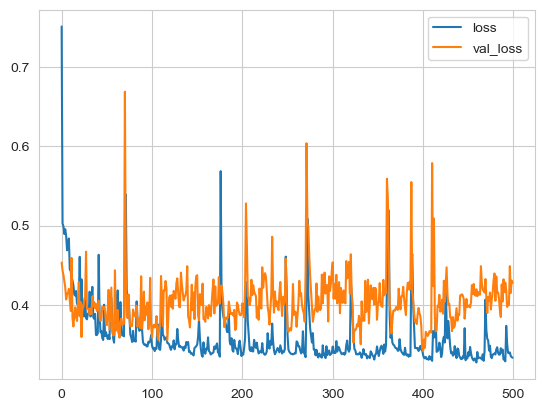

In [80]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [82]:
model.evaluate(X_test, y_test, verbose=0)

0.373998840212822

In [83]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1495   82]
 [ 190  233]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1577
           1       0.74      0.55      0.63       423

    accuracy                           0.86      2000
   macro avg       0.81      0.75      0.77      2000
weighted avg       0.86      0.86      0.86      2000



In [84]:
eval_metric(y_test, y_pred)

r2_score: 0.18449460402266038 
mae: 0.136 
mse: 0.136 
rmse: 0.3687817782917155


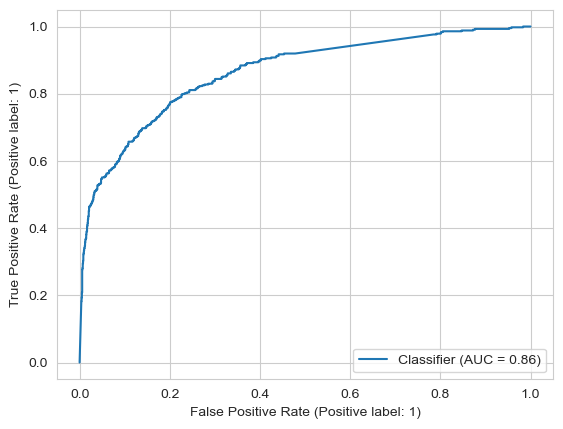

In [85]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [86]:
roc_auc_score(y_test, y_pred_proba)

0.8636711834272514

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [87]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(10, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1))

opt = adam_v2.Adam(learning_rate = 0.007)

model.compile(optimizer=opt, loss="binary_crossentropy")

In [88]:
model.weights

[<tf.Variable 'dense_16/kernel:0' shape=(10, 10) dtype=float32>,
 <tf.Variable 'dense_16/bias:0' shape=(10,) dtype=float32>,
 <tf.Variable 'dense_17/kernel:0' shape=(10, 8) dtype=float32>,
 <tf.Variable 'dense_17/bias:0' shape=(8,) dtype=float32>,
 <tf.Variable 'dense_18/kernel:0' shape=(8, 4) dtype=float32>,
 <tf.Variable 'dense_18/bias:0' shape=(4,) dtype=float32>,
 <tf.Variable 'dense_19/kernel:0' shape=(4, 1) dtype=float32>,
 <tf.Variable 'dense_19/bias:0' shape=(1,) dtype=float32>]

In [89]:
model.fit(x=X_train, y=y_train, validation_split=0.10, batch_size=36, epochs=500)

Train on 7200 samples, validate on 800 samples
Epoch 1/500
7200/7200 [==============================] - 2s 220us/sample - loss: 0.4975 - val_loss: 0.3960
Epoch 2/500
7200/7200 [==============================] - 1s 80us/sample - loss: 0.4234 - val_loss: 0.4198
Epoch 3/500
7200/7200 [==============================] - 1s 87us/sample - loss: 0.4154 - val_loss: 0.3589
Epoch 4/500
7200/7200 [==============================] - 1s 99us/sample - loss: 0.3882 - val_loss: 0.3411
Epoch 5/500
7200/7200 [==============================] - 1s 94us/sample - loss: 0.3670 - val_loss: 0.3342
Epoch 6/500
7200/7200 [==============================] - 1s 94us/sample - loss: 0.3621 - val_loss: 0.3303
Epoch 7/500
7200/7200 [==============================] - 1s 93us/sample - loss: 0.3639 - val_loss: 0.3291
Epoch 8/500
7200/7200 [==============================] - 1s 93us/sample - loss: 0.3779 - val_loss: 0.4015
Epoch 9/500
7200/7200 [==============================] - 1s 82us/sample - loss: 0.3892 - val_loss: 0.345

Epoch 77/500
7200/7200 [==============================] - 1s 99us/sample - loss: 0.3463 - val_loss: 0.3256
Epoch 78/500
7200/7200 [==============================] - 1s 98us/sample - loss: 0.3350 - val_loss: 0.3295
Epoch 79/500
7200/7200 [==============================] - 1s 95us/sample - loss: 0.3353 - val_loss: 0.3334
Epoch 80/500
7200/7200 [==============================] - 1s 104us/sample - loss: 0.3341 - val_loss: 0.3369
Epoch 81/500
7200/7200 [==============================] - 1s 94us/sample - loss: 0.3415 - val_loss: 0.3312
Epoch 82/500
7200/7200 [==============================] - 1s 94us/sample - loss: 0.3479 - val_loss: 0.3994
Epoch 83/500
7200/7200 [==============================] - 1s 100us/sample - loss: 0.3524 - val_loss: 0.3314
Epoch 84/500
7200/7200 [==============================] - 1s 103us/sample - loss: 0.3350 - val_loss: 0.3334
Epoch 85/500
7200/7200 [==============================] - 1s 98us/sample - loss: 0.3327 - val_loss: 0.3390
Epoch 86/500
7200/7200 [==========

7200/7200 [==============================] - 1s 82us/sample - loss: 0.3281 - val_loss: 0.3296
Epoch 154/500
7200/7200 [==============================] - 1s 84us/sample - loss: 0.3359 - val_loss: 0.3343
Epoch 155/500
7200/7200 [==============================] - 1s 84us/sample - loss: 0.3295 - val_loss: 0.3309
Epoch 156/500
7200/7200 [==============================] - 1s 95us/sample - loss: 0.3287 - val_loss: 0.3329
Epoch 157/500
7200/7200 [==============================] - 1s 93us/sample - loss: 0.3238 - val_loss: 0.3505
Epoch 158/500
7200/7200 [==============================] - 1s 89us/sample - loss: 0.3244 - val_loss: 0.3505
Epoch 159/500
7200/7200 [==============================] - 1s 93us/sample - loss: 0.3256 - val_loss: 0.3338
Epoch 160/500
7200/7200 [==============================] - 1s 93us/sample - loss: 0.3307 - val_loss: 0.3297
Epoch 161/500
7200/7200 [==============================] - 1s 90us/sample - loss: 0.3280 - val_loss: 0.3282
Epoch 162/500
7200/7200 [=================

Epoch 229/500
7200/7200 [==============================] - 1s 85us/sample - loss: 0.3261 - val_loss: 0.3478
Epoch 230/500
7200/7200 [==============================] - 1s 90us/sample - loss: 0.3299 - val_loss: 0.3555
Epoch 231/500
7200/7200 [==============================] - 1s 92us/sample - loss: 0.3317 - val_loss: 0.3363
Epoch 232/500
7200/7200 [==============================] - 1s 87us/sample - loss: 0.3239 - val_loss: 0.3455
Epoch 233/500
7200/7200 [==============================] - 1s 81us/sample - loss: 0.3292 - val_loss: 0.3433
Epoch 234/500
7200/7200 [==============================] - 1s 88us/sample - loss: 0.3271 - val_loss: 0.3374
Epoch 235/500
7200/7200 [==============================] - 1s 86us/sample - loss: 0.3327 - val_loss: 0.3351
Epoch 236/500
7200/7200 [==============================] - 1s 81us/sample - loss: 0.3287 - val_loss: 0.3406
Epoch 237/500
7200/7200 [==============================] - 1s 83us/sample - loss: 0.3906 - val_loss: 0.3620
Epoch 238/500
7200/7200 [===

Epoch 305/500
7200/7200 [==============================] - 1s 84us/sample - loss: 0.3372 - val_loss: 0.3295
Epoch 306/500
7200/7200 [==============================] - 1s 81us/sample - loss: 0.3969 - val_loss: 0.4304
Epoch 307/500
7200/7200 [==============================] - 1s 85us/sample - loss: 0.4188 - val_loss: 0.3629
Epoch 308/500
7200/7200 [==============================] - 1s 85us/sample - loss: 0.3608 - val_loss: 0.3395
Epoch 309/500
7200/7200 [==============================] - 1s 82us/sample - loss: 0.3381 - val_loss: 0.3246
Epoch 310/500
7200/7200 [==============================] - 1s 87us/sample - loss: 0.3292 - val_loss: 0.3267
Epoch 311/500
7200/7200 [==============================] - 1s 74us/sample - loss: 0.3239 - val_loss: 0.3246
Epoch 312/500
7200/7200 [==============================] - 1s 86us/sample - loss: 0.3254 - val_loss: 0.3301
Epoch 313/500
7200/7200 [==============================] - 1s 81us/sample - loss: 0.3426 - val_loss: 0.3280
Epoch 314/500
7200/7200 [===

7200/7200 [==============================] - 1s 81us/sample - loss: 0.3503 - val_loss: 0.4283
Epoch 381/500
7200/7200 [==============================] - 1s 86us/sample - loss: 0.3624 - val_loss: 0.3722
Epoch 382/500
7200/7200 [==============================] - 1s 83us/sample - loss: 0.3517 - val_loss: 0.4458
Epoch 383/500
7200/7200 [==============================] - 1s 87us/sample - loss: 0.3684 - val_loss: 0.4328
Epoch 384/500
7200/7200 [==============================] - 1s 87us/sample - loss: 0.4152 - val_loss: 0.6144
Epoch 385/500
7200/7200 [==============================] - 1s 84us/sample - loss: 0.5057 - val_loss: 0.6552
Epoch 386/500
7200/7200 [==============================] - 1s 83us/sample - loss: 0.4994 - val_loss: 0.6002
Epoch 387/500
7200/7200 [==============================] - 1s 84us/sample - loss: 0.4781 - val_loss: 0.5308
Epoch 388/500
7200/7200 [==============================] - 1s 77us/sample - loss: 0.4767 - val_loss: 0.4892
Epoch 389/500
7200/7200 [=================

Epoch 456/500
7200/7200 [==============================] - 1s 96us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 457/500
7200/7200 [==============================] - 1s 87us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 458/500
7200/7200 [==============================] - 1s 86us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 459/500
7200/7200 [==============================] - 1s 84us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 460/500
7200/7200 [==============================] - 1s 80us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 461/500
7200/7200 [==============================] - 1s 84us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 462/500
7200/7200 [==============================] - 1s 88us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 463/500
7200/7200 [==============================] - ETA: 0s - loss: 3.172 - 1s 91us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 464/500
7200/7200 [==============================] - 1s 84us/sample - loss: 3.1621 - val_loss: 2.6608
Epoc

<Axes: >

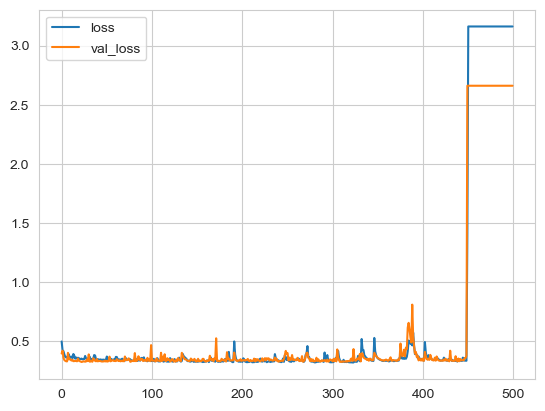

In [90]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [91]:
model.evaluate(X_test, y_test, verbose=0)

3.2623766021728517

In [92]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1577    0]
 [ 423    0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1577
           1       0.00      0.00      0.00       423

    accuracy                           0.79      2000
   macro avg       0.39      0.50      0.44      2000
weighted avg       0.62      0.79      0.70      2000



In [93]:
eval_metric(y_test, y_pred)

r2_score: -0.26823081800887727 
mae: 0.2115 
mse: 0.2115 
rmse: 0.45989129150267677


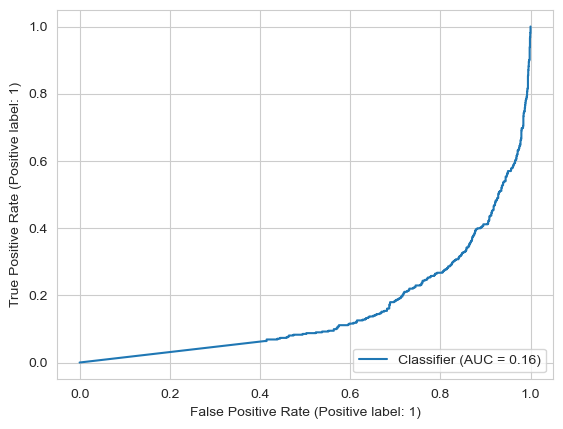

In [94]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [85]:
roc_auc_score(y_test, y_pred_proba)

0.3119053294177082

### Add Dropout Layer

In [95]:
from tensorflow.python.keras.layers import Dropout

In [96]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(10, activation="relu", input_dim=X_test.shape[1]))
model.add(Dropout(0.15))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.15))
model.add(Dense(4, activation="relu"))
model.add(Dropout(0.15))
model.add(Dense(1))

opt = adam_v2.Adam(learning_rate=0.007)

model.compile(optimizer=opt, loss="binary_crossentropy")

In [97]:
model.weights

[<tf.Variable 'dense_20/kernel:0' shape=(10, 10) dtype=float32>,
 <tf.Variable 'dense_20/bias:0' shape=(10,) dtype=float32>,
 <tf.Variable 'dense_21/kernel:0' shape=(10, 8) dtype=float32>,
 <tf.Variable 'dense_21/bias:0' shape=(8,) dtype=float32>,
 <tf.Variable 'dense_22/kernel:0' shape=(8, 4) dtype=float32>,
 <tf.Variable 'dense_22/bias:0' shape=(4,) dtype=float32>,
 <tf.Variable 'dense_23/kernel:0' shape=(4, 1) dtype=float32>,
 <tf.Variable 'dense_23/bias:0' shape=(1,) dtype=float32>]

In [98]:
model.fit(x=X_train, y=y_train, validation_split=0.10, batch_size=36, epochs=500)

Train on 7200 samples, validate on 800 samples
Epoch 1/500
7200/7200 [==============================] - 2s 336us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 2/500
7200/7200 [==============================] - 1s 116us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 3/500
7200/7200 [==============================] - 1s 110us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 4/500
7200/7200 [==============================] - 1s 109us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 5/500
7200/7200 [==============================] - 1s 113us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 6/500
7200/7200 [==============================] - 1s 111us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 7/500
7200/7200 [==============================] - 1s 111us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 8/500
7200/7200 [==============================] - 1s 113us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 9/500
7200/7200 [==============================] - 1s 106us/sample - loss: 3.1621 - val_los

7200/7200 [==============================] - 1s 108us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 77/500
7200/7200 [==============================] - 1s 114us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 78/500
7200/7200 [==============================] - 1s 113us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 79/500
7200/7200 [==============================] - 1s 110us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 80/500
7200/7200 [==============================] - 1s 113us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 81/500
7200/7200 [==============================] - 1s 115us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 82/500
7200/7200 [==============================] - 1s 105us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 83/500
7200/7200 [==============================] - 1s 105us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 84/500
7200/7200 [==============================] - 1s 116us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 85/500
7200/7200 [=================

7200/7200 [==============================] - 1s 111us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 152/500
7200/7200 [==============================] - 1s 106us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 153/500
7200/7200 [==============================] - 1s 115us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 154/500
7200/7200 [==============================] - 1s 109us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 155/500
7200/7200 [==============================] - 1s 110us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 156/500
7200/7200 [==============================] - 1s 119us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 157/500
7200/7200 [==============================] - 1s 113us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 158/500
7200/7200 [==============================] - 1s 108us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 159/500
7200/7200 [==============================] - 1s 116us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 160/500
7200/7200 [========

7200/7200 [==============================] - 1s 106us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 227/500
7200/7200 [==============================] - 1s 108us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 228/500
7200/7200 [==============================] - 1s 106us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 229/500
7200/7200 [==============================] - 1s 106us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 230/500
7200/7200 [==============================] - 1s 113us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 231/500
7200/7200 [==============================] - 1s 109us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 232/500
7200/7200 [==============================] - 1s 118us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 233/500
7200/7200 [==============================] - 1s 107us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 234/500
7200/7200 [==============================] - 1s 107us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 235/500
7200/7200 [========

7200/7200 [==============================] - 1s 116us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 302/500
7200/7200 [==============================] - 1s 109us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 303/500
7200/7200 [==============================] - 1s 119us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 304/500
7200/7200 [==============================] - 1s 108us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 305/500
7200/7200 [==============================] - 1s 109us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 306/500
7200/7200 [==============================] - 1s 118us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 307/500
7200/7200 [==============================] - 1s 107us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 308/500
7200/7200 [==============================] - 1s 111us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 309/500
7200/7200 [==============================] - 1s 115us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 310/500
7200/7200 [========

7200/7200 [==============================] - 1s 111us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 377/500
7200/7200 [==============================] - 1s 100us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 378/500
7200/7200 [==============================] - 1s 106us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 379/500
7200/7200 [==============================] - 1s 107us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 380/500
7200/7200 [==============================] - 1s 109us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 381/500
7200/7200 [==============================] - 1s 104us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 382/500
7200/7200 [==============================] - 1s 107us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 383/500
7200/7200 [==============================] - 1s 106us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 384/500
7200/7200 [==============================] - 1s 107us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 385/500
7200/7200 [========

7200/7200 [==============================] - 1s 109us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 452/500
7200/7200 [==============================] - 1s 107us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 453/500
7200/7200 [==============================] - 1s 109us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 454/500
7200/7200 [==============================] - 1s 103us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 455/500
7200/7200 [==============================] - 1s 106us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 456/500
7200/7200 [==============================] - 1s 114us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 457/500
7200/7200 [==============================] - 1s 118us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 458/500
7200/7200 [==============================] - 1s 100us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 459/500
7200/7200 [==============================] - 1s 116us/sample - loss: 3.1621 - val_loss: 2.6608
Epoch 460/500
7200/7200 [========

<Axes: >

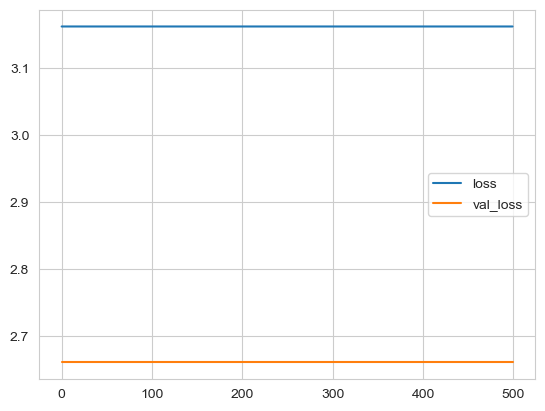

In [99]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [100]:
model.evaluate(X_test, y_test, verbose=0)

3.2623766021728517

In [101]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1577    0]
 [ 423    0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1577
           1       0.00      0.00      0.00       423

    accuracy                           0.79      2000
   macro avg       0.39      0.50      0.44      2000
weighted avg       0.62      0.79      0.70      2000



In [102]:
eval_metric(y_test, y_pred)

r2_score: -0.26823081800887727 
mae: 0.2115 
mse: 0.2115 
rmse: 0.45989129150267677


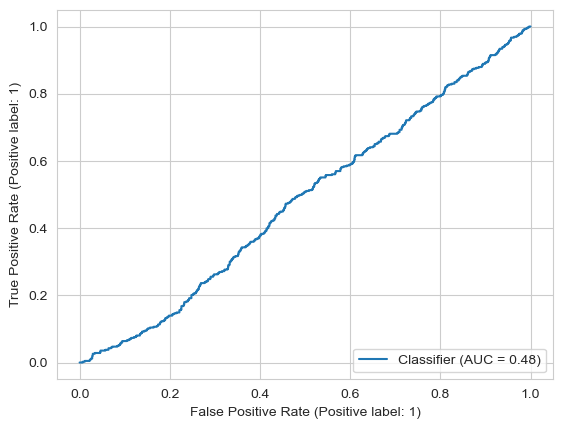

In [103]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [104]:
roc_auc_score(y_test, y_pred_proba)

0.4832746439284574

### Add Early Stop

#### Monitor the "val_loss" as metric

In [105]:
from tensorflow.python.keras.callbacks import EarlyStopping

In [106]:
model = Sequential()

model.add(Dense(10, activation="relu", input_dim= X_train.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1))

opt = adam_v2.Adam(learning_rate=0.007)

model.compile(optimizer=opt, loss="binary_crossentropy")

In [107]:
model.weights

[<tf.Variable 'dense_24/kernel:0' shape=(10, 10) dtype=float32>,
 <tf.Variable 'dense_24/bias:0' shape=(10,) dtype=float32>,
 <tf.Variable 'dense_25/kernel:0' shape=(10, 8) dtype=float32>,
 <tf.Variable 'dense_25/bias:0' shape=(8,) dtype=float32>,
 <tf.Variable 'dense_26/kernel:0' shape=(8, 4) dtype=float32>,
 <tf.Variable 'dense_26/bias:0' shape=(4,) dtype=float32>,
 <tf.Variable 'dense_27/kernel:0' shape=(4, 1) dtype=float32>,
 <tf.Variable 'dense_27/bias:0' shape=(1,) dtype=float32>]

In [108]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25, restore_best_weights=True)

In [109]:
model.fit(x=X_train, y=y_train, validation_split=0.10, batch_size=36, epochs=500, callbacks=[early_stop])

Train on 7200 samples, validate on 800 samples
Epoch 1/500
7200/7200 [==============================] - 2s 343us/sample - loss: 0.4337 - val_loss: 0.3770
Epoch 2/500
7200/7200 [==============================] - 1s 90us/sample - loss: 0.3920 - val_loss: 0.3477
Epoch 3/500
7200/7200 [==============================] - 1s 100us/sample - loss: 0.3756 - val_loss: 0.3305
Epoch 4/500
7200/7200 [==============================] - 1s 98us/sample - loss: 0.3764 - val_loss: 0.3403
Epoch 5/500
7200/7200 [==============================] - 1s 95us/sample - loss: 0.3671 - val_loss: 0.3501
Epoch 6/500
7200/7200 [==============================] - 1s 96us/sample - loss: 0.3586 - val_loss: 0.3396
Epoch 7/500
7200/7200 [==============================] - 1s 91us/sample - loss: 0.3963 - val_loss: 0.3873
Epoch 8/500
7200/7200 [==============================] - 1s 95us/sample - loss: 0.4058 - val_loss: 0.3630
Epoch 9/500
7200/7200 [==============================] - 1s 100us/sample - loss: 0.3982 - val_loss: 0.3

<Axes: >

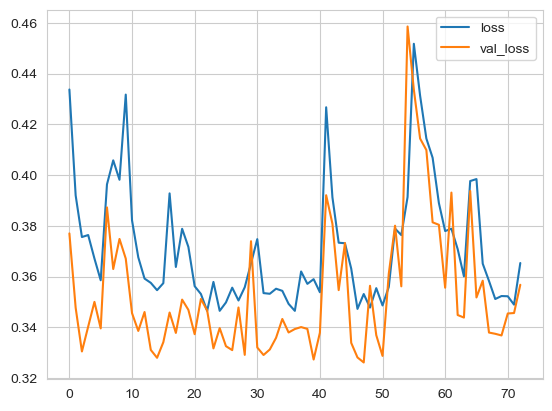

In [110]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [111]:
model.evaluate(X_test, y_test, verbose=0)

0.33405785608291627

In [112]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1529   48]
 [ 223  200]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1577
           1       0.81      0.47      0.60       423

    accuracy                           0.86      2000
   macro avg       0.84      0.72      0.76      2000
weighted avg       0.86      0.86      0.85      2000



In [104]:
eval_metric(y_test, y_pred)

r2_score: 0.17250187761122893 
mae: 0.138 
mse: 0.138 
rmse: 0.3714835124201342


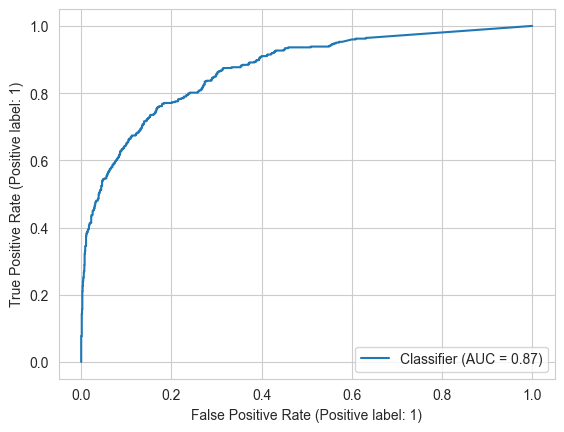

In [105]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [106]:
roc_auc_score(y_test, y_pred_proba)

0.870762632463411

# Final Model and Model Deployment

In [132]:
import pickle
pickle.dump(tf, open("transformer_churn", "wb"))
pickle.dump(scaler, open("scaler_churn", "wb"))

TypeError: cannot pickle 'module' object

In [129]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(units = 20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(units = 10, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))

opt = Nadam(lr = 0.003)

model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 100, restore_best_weights = True)

model.fit(x = X_train, 
          y = y_train, 
          validation_data = (X_test, y_test), 
          callbacks = [early_stop], 
          batch_size = 256,
          epochs = 500,
          verbose = 1,
          class_weight = class_weights)

NameError: name 'class_weights' is not defined

In [123]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

AttributeError: 'NoneType' object has no attribute 'history'

In [157]:
model.evaluate(X_test, y_test, verbose=0)

0.35162562131881714

In [158]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1539   38]
 [ 240  183]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1577
           1       0.83      0.43      0.57       423

    accuracy                           0.86      2000
   macro avg       0.85      0.70      0.74      2000
weighted avg       0.86      0.86      0.84      2000



## Prediction

In [124]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

CreditScore           619.00
Geography               0.00
Gender                  1.00
Age                    42.00
Tenure                  2.00
Balance                 0.00
NumOfProducts           1.00
HasCrCard               1.00
IsActiveMember          1.00
EstimatedSalary    101348.88
Name: 0, dtype: float64

In [125]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 10))
single_customer

array([[-0.24626866,  0.        ,  1.        ,  0.41666667, -0.6       ,
        -0.76299685,  0.        ,  0.        ,  0.        ,  0.00636556]])

In [133]:
y_pred =model.predict(single_customer).astype("int32")
y_pred

array([[0]])

In [134]:
# sad model
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___